# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.



## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Arthur De Neyer - 74842100

Part. 2: Axel Snessens - 29202100

Part. 3: Andrea Dalmasso - 16012100

Part. 4: Meriemque Marie - 59971900

Part. 5: Nouha El Hariri - 03032100 

Part. 6: Aylin Defoy - 62322100

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from tabulate import tabulate

# ===== Load CSV & convert dates =====

data = pd.read_csv('Radiation.csv')

data['DATE'] = pd.to_datetime(data['DATE'], format="%Y%m%d")

# Apply formula: C = E_Sol x 24 x P_cr x f_perf for both cities data
data['Caen'] = data['Caen']*24*0.18*0.75
data['Tours'] = data['Tours']*24*0.18*0.75


# parsing data to keep 1 line out of 100 (better visibility, less precision)
clean_data = data.iloc[range(0, len(data), 100), :]  

In [ ]:
# A

# ===== Plot settings =====

# taille
plt.figure(figsize=(36, 12))
plt.xlim(pd.Timestamp('1974-01-01'), pd.Timestamp('2023-12-31'))

# étiquette arrière plan
plt.grid(True)
years = mdates.YearLocator()
year_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(year_fmt)
plt.xticks(rotation=45)

# légende
plt.xlabel('Date')
plt.ylabel('solar electric production (WH/m²)')
plt.title('solar electric production in Caen and Tours from 1974 to 2023')

# ===== Plot =====

plt.plot(clean_data['DATE'], clean_data['Caen'], label='Caen', color='darkgoldenrod')

plt.fill_between(clean_data['DATE'], clean_data['Caen'], color='darkgoldenrod', alpha=0.3)

plt.plot(clean_data['DATE'], clean_data['Tours'], label='Tours', color='darkblue')

plt.show()

In [ ]:
# B

x = [data['Caen'],
     data['Tours']]
df = pd.DataFrame(x, index=['Caen', 'Tours'])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [ ]:
# C

# parsing data to keep 1 line out of 100 (better visibility, less precision)
clean_data = data.iloc[range(0, len(data), 100), :]  
# Donnée abérante de Caean
DataC = data.sort_values(by="Caen", axis=0)
Q1C = data["Caen"].quantile(0.25)
Q3C = data["Caen"].quantile(0.75)
MaxC = Q3C + 1.5 * (Q3C - Q1C)
MinC = Q1C - 1.5 * (Q3C - Q1C)

# Donnée abérante de Tours
DataT = data.sort_values(by="Tours", axis=0)
Q1T = data["Tours"].quantile(0.25)
Q3T = data["Tours"].quantile(0.75)
MaxT = Q3T + 1.5 * (Q3T - Q1T)
MinT = Q1T - 1.5 * (Q3T - Q1T)

# Variable avec données filtrées
DataParse = data[(DataC["Caen"] >= MinC) & (DataC["Caen"] <= MaxC) & (DataT["Tours"] >= MinT) & (DataT["Tours"] <= MaxT)]


In [ ]:
# D

# ===== Plot settings =====

# taille
plt.figure(figsize=(36, 12))
plt.xlim(pd.Timestamp('1974-01-01'), pd.Timestamp('2023-12-31'))

# étiquette arrière plan
plt.grid(True)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(year_fmt)
plt.xticks(rotation=45)

# légende
plt.xlabel('Date')
plt.ylabel('solar electric production (WH/m²)')
plt.title('solar electric production in Caen and Tours from 1974 to 2023 whithout outliers')

# ===== Plot =====
clean_data2 = DataParse.iloc[range(0, len(DataParse), 100), :]

plt.plot(clean_data2['DATE'], clean_data2['Caen'], label='Caen', color='darkgoldenrod')

plt.fill_between(clean_data2['DATE'], clean_data2['Caen'], color='darkgoldenrod', alpha=0.3)

plt.plot(clean_data2['DATE'], clean_data2['Tours'], label='Tours', color='darkblue')

plt.show()

---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [17]:
data_Caen = {
    "Month":['J','F','M','A','M','J','J','A','S','O','N','D'],
    " x̄  ": DataParse.groupby(DataParse['DATE'].dt.month)['Caen'].mean(),
    "   Median": DataParse.groupby(DataParse['DATE'].dt.month)['Caen'].median(),
    "σ  ": DataParse.groupby(DataParse['DATE'].dt.month)['Caen'].std(),
    "   P5% ": DataParse.groupby(DataParse['DATE'].dt.month)['Caen'].quantile(0.05),
    "  P95%": DataParse.groupby(DataParse['DATE'].dt.month)['Caen'].quantile(0.95)
}

data_Tours = {
    "Month":['J','F','M','A','M','J','J','A','S','O','N','D'],
    " x̄  ":  DataParse.groupby(DataParse['DATE'].dt.month)['Tours'].mean(),
    "   Median": DataParse.groupby(DataParse['DATE'].dt.month)['Tours'].median(),
    "σ  ": DataParse.groupby(DataParse['DATE'].dt.month)['Tours'].std(),
    "  P5% ": DataParse.groupby(DataParse['DATE'].dt.month)['Tours'].quantile(0.05),
    "  P95%": DataParse.groupby(DataParse['DATE'].dt.month)['Tours'].quantile(0.95)
}

caen_table = pd.DataFrame(data_Caen)
caen_table = caen_table.set_index("Month").round(3)


tours_table = pd.DataFrame(data_Tours)
tours_table = tours_table.set_index("Month").round(3)

print("\nCaen's calculations:\n")
print(caen_table) 
print("\nTours's calculations:\n")
print(tours_table) 

print("""
\n Result comparison and statistic comments:\n
* In most months, Caen's mean (x̄) id slightly higher than Tours' mean (x̄).
* In general, Caen's and Tours' median values are very similiar (sometimes even identical) in several months.
* Caen's standard deviation (σ) is higher than Tours', meaning that Caen's values vary more.
* Caen's 5th and 95th percentile values are slightly higher in most months compared to Tours'.
"""
)


12

Caen's calculations:

          x̄       Median      σ       P5%      P95%
Month                                               
J      146.875     123.12  113.159   42.120   304.56
F      250.502     223.56  169.343   70.794   466.56
M      377.936     359.64  186.509  126.360   654.48
A      560.371     573.48  210.446  204.120   874.80
M      677.079     703.08  255.097  233.280  1033.56
J      736.640     751.68  265.879  291.600  1108.08
J      725.442     738.72  241.355  317.520  1065.96
A      623.101     638.28  198.019  282.690   913.68
S      459.978     466.56  168.787  181.926   709.56
O      282.712     268.92  154.382   88.614   492.48
N      173.026     155.52  124.766   48.600   314.28
D      114.459     100.44   83.661   29.160   207.36

Tours's calculations:

          x̄       Median      σ       P5%       P95%
Month                                                
J      158.135     123.12  134.682   45.360   332.424
F      273.321     236.52  194.881   71.280   

---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


In [ ]:
import pandas as pd
from scipy.stats import gamma, norm
import numpy as np
import matplotlib.pyplot as plt



# ===== Load CSV & convert dates ===== #

df = pd.read_csv('Radiation.csv')

dates = pd.to_datetime(df['DATE'], format='%Y%m%d')
dates_avril = dates[dates.dt.month == 4]

# ===== Caen/Tours data ===== #
caen_data = df['Caen']
tours_data = df['Tours']

# ===== April data ===== #
april_caen = []
april_tours = []

for index in dates_avril.index:
    april_caen.append(caen_data[index]* 24 * 0.18 * 0.75)
    april_tours.append(tours_data[index]* 24 * 0.18 * 0.75)

#print(april_tours)

## 1) Fit Gamma and normal distributions by log-likelihood maximization to daily production of electricity during April (Caen & Tours)
print("===== 1 =====")  

# ===== Caen ===== #
# Fit Gamma distribution
gamma_params_caen = gamma.fit(april_caen, floc= -0.001)
print(gamma_params_caen)

# Fit Normal distribution
normal_params_caen = norm.fit(april_caen)
print(normal_params_caen)

# ===== Tours ===== #
# Fit Gamma distribution
gamma_params_tours = gamma.fit(april_tours, floc= -0.001)
print(gamma_params_tours)

# Fit Normal distribution
normal_params_tours = norm.fit(april_tours)
print(normal_params_tours)

## 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
print("===== 2 =====")

# ===== Caen ===== #
# Gamma
log_likelihood_gamma_caen = gamma.logpdf(april_caen, *gamma_params_caen).sum()
print(log_likelihood_gamma_caen)

# Normal
log_likelihood_normal_caen = norm.logpdf(april_caen, *normal_params_caen).sum()
print(log_likelihood_normal_caen)

# ===== Tours ===== #
# Gamma
log_likelihood_gamma_tours = gamma.logpdf(april_tours, *gamma_params_tours).sum()
print(log_likelihood_gamma_tours)

# Normal
log_likelihood_normal_tours = norm.logpdf(april_tours, *normal_params_tours).sum()
print(log_likelihood_normal_tours)

# Compare and select the best model
best_model_caen = "Gamma" if log_likelihood_gamma_caen > log_likelihood_normal_caen else "Normal"
best_model_tours = "Gamma" if log_likelihood_gamma_tours > log_likelihood_normal_tours else "Normal"

# Print and justify the best models
print(f"Best model for Caen: {best_model_caen} (Log-Likelihood: {log_likelihood_gamma_caen if best_model_caen == 'Gamma' else log_likelihood_normal_caen})")
print(f"Best model for Tours: {best_model_tours} (Log-Likelihood: {log_likelihood_gamma_tours if best_model_tours == 'Gamma' else log_likelihood_normal_tours})")


## 3) Compare on the same plot the empirical, the gamma and normal pdf (the empirical pdf is an histogram of frequencies)

# ===== Caen ===== #
# Gamma
gamma_x_caen = np.linspace(0, 1000, 1000)
gamma_y_caen = gamma.pdf(gamma_x_caen, *gamma_params_caen)

# Normal
normal_x_caen = np.linspace(0, 1000, 1000)
normal_y_caen = norm.pdf(normal_x_caen, *normal_params_caen)

# ===== Tours ===== #
# Gamma
gamma_x_tours = np.linspace(0, 1000, 1000)
gamma_y_tours = gamma.pdf(gamma_x_tours, *gamma_params_tours)

# Normal
normal_x_tours = np.linspace(0, 1000, 1000)
normal_y_tours = norm.pdf(normal_x_tours, *normal_params_tours)

# ===== Plot ===== #

# Caen
plt.figure()
plt.hist(april_caen, bins=100, density=True, label='Empirical')
plt.plot(gamma_x_caen, gamma_y_caen, label='Gamma')
plt.plot(normal_x_caen, normal_y_caen, label='Normal')
plt.legend()
plt.title('Caen')
plt.show()

# Tours
plt.figure()
plt.hist(april_tours, bins=100, density=True, label='Empirical')
plt.plot(gamma_x_tours, gamma_y_tours, label='Gamma')
plt.plot(normal_x_tours, normal_y_tours, label='Normal')
plt.legend()
plt.title('Tours')
plt.show()



---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [ ]:
import pandas as pd
import scipy.stats as sc
from scipy import stats
import numpy as np


# ===== Load CSV & convert dates ===== #

df = pd.read_csv('Radiation.csv')
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# ===== Caen/Tours data ===== #
# Filtrer les données pour le mois d'avril
april_data = df[df['DATE'].dt.month == 4]

caen_data = april_data['Caen']
tours_data = april_data['Tours']

# Calculer les moyennes quotidiennes pour chaque ville
daily_avg_caen = caen_data.groupby(april_data['DATE'].dt.day).mean()
daily_avg_tours = tours_data.groupby(april_data['DATE'].dt.day).mean()




# Calculer la production d'énergie pour chaque ville
daily_avg_caen_energy = daily_avg_caen.apply(lambda x: x*24*0.18*0.75).tolist()
daily_avg_tours_energy = daily_avg_tours.apply(lambda x: x*24*0.18*0.75).tolist()



mu_stat, p_value = stats.ttest_ind(daily_avg_caen_energy, daily_avg_tours_energy)

alpha = 0.05 # We can change this value depending on what we want 
if p_value > alpha:
    print(f"H_0 non rejettée. La p_valeur {p_value} est plus grande que notre alpha ({alpha}).")
else:
    print(f"H_0 rejettée. La p_valeur {p_value} est plus petite que notre alpha ({alpha}).")



---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


In [ ]:

# ===== Caen/Tours data ===== #
# Filtrer les données pour le mois d'avril
april_data = df[df['DATE'].dt.month == 4]

caen_data = april_data['Caen']
tours_data = april_data['Tours']

# Calculer les moyennes quotidiennes pour chaque ville
daily_avg_caen = caen_data.groupby(april_data['DATE'].dt.day).mean()
daily_avg_tours = tours_data.groupby(april_data['DATE'].dt.day).mean()




# Calculer la production d'énergie pour chaque ville
daily_avg_caen_energy = daily_avg_caen.apply(lambda x: x*24*0.18*0.75).tolist()
daily_avg_tours_energy = daily_avg_tours.apply(lambda x: x*24*0.18*0.75).tolist()

print(daily_avg_caen_energy)
print(daily_avg_tours_energy)

variance_stat, p_value = stats.levene(daily_avg_caen_energy, daily_avg_tours_energy)

alpha = 0.05 # We can change this value depending on what we want 
if p_value > alpha:
    print(f"H_0 non rejettée. La p_valeur {p_value} est plus grande que notre alpha ({alpha}).")
else:
    print(f"H_0 rejettée. La p_valeur {p_value} est plus petite que notre alpha ({alpha}). Il y a donc une trop grosse différence entre les deux villes")


---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [ ]:

# ===== Load CSV & convert dates ===== #

df = pd.read_csv('Radiation.csv')
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# ===== Caen/Tours data ===== #
# Filtrer les données pour le mois d'avril
april_data = df[df['DATE'].dt.month == 4]

caen_data = april_data['Caen']
tours_data = april_data['Tours']

# Calculer les moyennes quotidiennes pour chaque ville
daily_avg_caen = caen_data.groupby(april_data['DATE'].dt.day).mean()
daily_avg_tours = tours_data.groupby(april_data['DATE'].dt.day).mean()




# Calculer la production d'énergie pour chaque ville
daily_avg_caen_energy = daily_avg_caen.apply(lambda x: x*24*0.18*0.75).tolist()
daily_avg_tours_energy = daily_avg_tours.apply(lambda x: x*24*0.18*0.75).tolist()


wilcoxon_stat, p_value = stats.wilcoxon(daily_avg_caen_energy, daily_avg_tours_energy)

alpha = 0.05 # We can change this value depending on what we want 
if p_value > alpha:
    print(f"H_0 non rejettée. La p_valeur {p_value} est plus grande que notre alpha ({alpha}). La production quotidienne des deux villes n'a donc pas de différences significatives.")
else:
    print(f"H_0 rejettée. La p_valeur {p_value} est plus petite que notre alpha ({alpha}). Il y a donc une trop grosse différence entre la production des 2 villes.")

---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


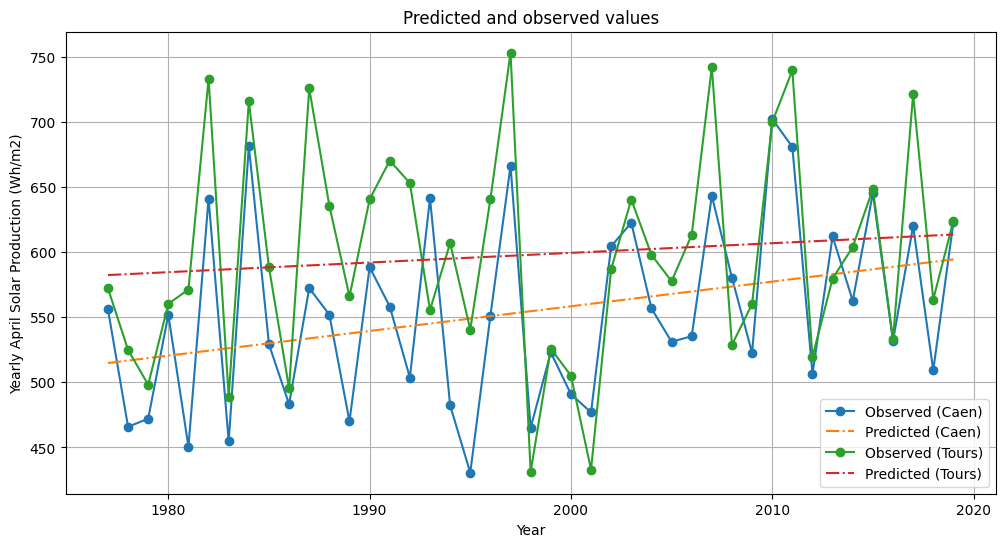

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# ===== Load CSV & convert dates =====

data = pd.read_csv('Radiation.csv')

data['DATE'] = pd.to_datetime(data['DATE'], format="%Y%m%d")

# Apply formula: C = E_Sol x 24 x P_cr x f_perf for both cities data
data['Caen'] = data['Caen']*24*0.18*0.75
data['Tours'] = data['Tours']*24*0.18*0.75

# Moyenne des Avrils
april = data[['Caen','Tours']][(data['DATE'].dt.month == 4) & (data['DATE'].dt.year >= 1977) & (data['DATE'].dt.year <= 2019)]
april_mean = april.groupby(data['DATE'].dt.year).mean()

april_mean['X'] = april_mean.index-1977

# Fit regression for caen
model_caen = sm.OLS(april_mean['Caen'], sm.add_constant(april_mean['X']) ).fit()

# Fit regression
model_tours = sm.OLS(april_mean['Tours'], sm.add_constant(april_mean['X']) ).fit()

#we calculate the predicted values
y_pred_caen = model_caen.predict(sm.add_constant(april_mean['X']))
y_pred_tours = model_tours.predict(sm.add_constant(april_mean['X']))

#graph
plt.figure(figsize=(12, 6))
plt.plot(april_mean.index, april_mean['Caen'], label='Observed (Caen)', marker='o')
plt.plot(april_mean.index, y_pred_caen, label='Predicted (Caen)', linestyle='-.')
plt.plot(april_mean.index, april_mean['Tours'], label='Observed (Tours)', marker='o')
plt.plot(april_mean.index, y_pred_tours, label='Predicted (Tours)', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('Yearly April Solar Production (Wh/m2)')
plt.title('Predicted and observed values')
plt.grid()
plt.legend()
plt.show()




---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [ ]:
#code here


---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

In [ ]:
# code here
